# Notes

- it seems that the TF-DF is going to the right node if the condition is met
    - if value > 3 go to right node
    - vs the others trees .... if value < 3 go to left
        - It's the same thing, but ask from different angle
    

In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from dtreeviz.models.tfdf_decision_tree import ShadowTFDFTree

import tensorflow_decision_forests as tfdf
import tensorflow_decision_forests
import pandas as pd

from sklearn.model_selection import train_test_split
from collections import defaultdict

from dtreeviz.trees import *

# Data preprocessing

In [3]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [4]:
dataset[features + [target]]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
0,3,22.000000,7.2500,1,-1,2,0
1,1,38.000000,71.2833,0,81,0,1
2,3,26.000000,7.9250,0,-1,2,1
3,1,35.000000,53.1000,0,55,2,1
4,3,35.000000,8.0500,1,-1,2,0
...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,1,-1,2,0
887,1,19.000000,30.0000,0,30,2,1
888,3,29.699118,23.4500,0,-1,2,0
889,1,26.000000,30.0000,1,60,0,1


# Classification

## Model training

In [5]:
random_seed = 1234

In [6]:
train, test = train_test_split(dataset[features + [target]], train_size=0.9, stratify=dataset.Survived)

In [7]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label=target)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label=target)

In [8]:
tfdf.__version__

'0.2.4'

In [9]:
model = tfdf.keras.RandomForestModel(max_depth=4, random_seed = random_seed)


Use /var/folders/yp/rczwnkhn6nn9mfcf0bgc61jh0000gn/T/tmpw9znmca1 as temporary training directory


In [10]:
model.fit(train_ds)


Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:03.721085
Training model
Model trained in 0:00:00.029336
Compiling model
1/1 [==============================] - 4s 4s/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
model.compile(metrics=["accuracy"])


In [12]:
print(model.evaluate(test_ds))


1/1 [==============================] - 0s 342ms/step - loss: 0.0000e+00 - accuracy: 0.7889
[0.0, 0.7888888716697693]


## Model metadata discovery

### Prepare for HTML

In [96]:

print(tfdf.model_plotter.plot_model(model, tree_idx=0))


<script src="https://d3js.org/d3.v6.min.js"></script>
<div id="tree_plot_ebefda752a614c96b247d21a734e18b4"></div>
<script>
/*
 * Copyright 2021 Google LLC.
 * Licensed under the Apache License, Version 2.0 (the "License");
 * you may not use this file except in compliance with the License.
 * You may obtain a copy of the License at
 *
 *     https://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing, software
 * distributed under the License is distributed on an "AS IS" BASIS,
 * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 * See the License for the specific language governing permissions and
 * limitations under the License.
 */

/**
 *  Plotting of decision trees generated by TF-DF.
 *
 *  A tree is a recursive structure of node objects.
 *  A node contains one or more of the following components:
 *
 *    - A value: Representing the output of the node. If the node is not a leaf,
 *      the value is only 

In [14]:
train[train.Cabin_label >= 1].shape

(181, 7)

In [15]:
train[train.Cabin_label < 1].shape

(620, 7)

## dtreeviz - model interpretation

In [93]:
tfdf_shadow = ShadowTFDFTree(model, tree_index=0, 
                             x_data=train[features], 
                             y_data=train[target], 
                             feature_names=features, 
                             target_name=target,
                             class_names=[0, 1])

In [94]:
tfdf_shadow.get_thresholds()

/Users/tudor.lapusan/Documents/workspace/personal/dtreeviz/notebooks/../dtreeviz/models/tfdf_decision_tree.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.thresholds = np.array(thresholds)


array([2.5, ([1], []), 10.0, -2, -2, 28.856250762939453, -2, -2,
       ([1], []), 7.910400390625, -2, -2, 7.887499809265137, -2, -2],
      dtype=object)

### Tree structure

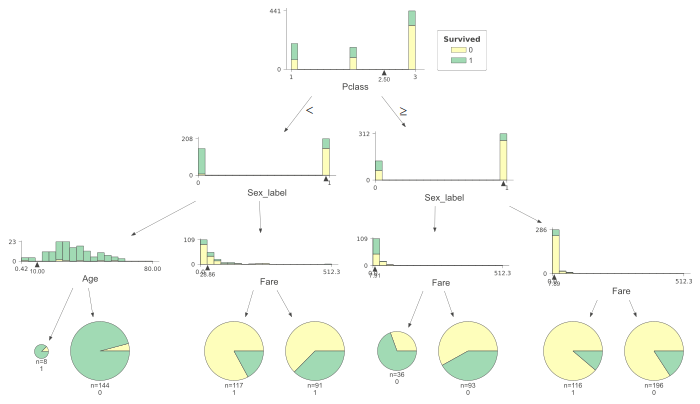

In [95]:
dtreeviz(tfdf_shadow)

In [106]:
train.iloc[tfdf_shadow.get_node_samples()[10]][:3]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label,Survived
593,3,29.699118,7.7500,0,-1,1,0
82,3,29.699118,7.7875,0,-1,1,1
649,3,23.000000,7.5500,0,-1,2,1


In [115]:
print(train[train.Pclass < 2.5][train.Sex_label < 1][train.Age < 10].shape)
print(train[train.Pclass < 2.5][train.Sex_label < 1][train.Age >= 10].shape)
print(train[train.Pclass < 2.5][train.Sex_label >= 1][train.Fare <28.86].shape)
print(train[train.Pclass < 2.5][train.Sex_label >= 1][train.Fare >= 28.86].shape)
print(train[train.Pclass >= 2.5][train.Sex_label < 1][train.Fare < 7.91].shape)
print(train[train.Pclass >= 2.5][train.Sex_label < 1][train.Fare >= 7.91].shape)
print(train[train.Pclass >= 2.5][train.Sex_label >= 1][train.Fare < 7.89].shape)
print(train[train.Pclass >= 2.5][train.Sex_label >= 1][train.Fare >= 7.89].shape)

(8, 7)
(144, 7)
(117, 7)
(91, 7)
(36, 7)
(93, 7)
(117, 7)
(195, 7)


<ipython-input-115-f06311a350a6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train[train.Pclass < 2.5][train.Sex_label < 1][train.Age < 10].shape)
<ipython-input-115-f06311a350a6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train[train.Pclass < 2.5][train.Sex_label < 1][train.Age < 10].shape)
<ipython-input-115-f06311a350a6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train[train.Pclass < 2.5][train.Sex_label < 1][train.Age >= 10].shape)
<ipython-input-115-f06311a350a6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train[train.Pclass < 2.5][train.Sex_label < 1][train.Age >= 10].shape)
<ipython-input-115-f06311a350a6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train[train.Pclass < 2.5][train.Sex_label >= 1][train.Fare <28.86].shape)
<ipython-input-115-f06311a350a6>:3: UserWarn

In [63]:
train[train.Cabin_label < 2.5][train.Sex_label < 1][train.Age < 10].shape

<ipython-input-63-55e22796e699>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train.Cabin_label < 2.5][train.Sex_label < 1][train.Age < 10].shape
<ipython-input-63-55e22796e699>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train.Cabin_label < 2.5][train.Sex_label < 1][train.Age < 10].shape


(24, 7)

In [54]:
train[train.Cabin_label < 2.5][train.Sex_label >= 1][train.Fare < 28.86].shape

<ipython-input-54-fc56d03dafed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train.Cabin_label < 2.5][train.Sex_label >= 1][train.Fare < 28.86].shape
<ipython-input-54-fc56d03dafed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[train.Cabin_label < 2.5][train.Sex_label >= 1][train.Fare < 28.86].shape


(378, 7)

In [52]:
t = train[train.Cabin_label < 2.5]
t = t[t.Sex_label >=1]
t = t[t.Fare < 28.86]

In [53]:
t.shape

(378, 7)

In [ ]:
tree = model.make_inspector().extract_tree(tree_idx=1)

In [ ]:
tfdf_shadow.tree_nodes[7]

In [ ]:
tfdf_shadow.tree_nodes[7].condition.threshold

In [ ]:
tfdf_shadow.tree_nodes[3]

In [ ]:
tfdf_shadow.tree_nodes[3].condition.mask

In [ ]:
dir(tfdf_shadow.tree_nodes[3].condition)

#### Potential bug from tf-df visualisation
- the node samples from its tree visualisations is not the same with my calculations

In [ ]:
train.shape

In [ ]:
train[train.Cabin_label >= 9.5].shape

In [ ]:
train[train.Cabin_label < 9.5].shape

# Unit tests
This section was using during development phase and unit testing

In [10]:
from tensorflow_decision_forests.component.inspector import inspector as inspector_lib


In [76]:
random_state = 1234
dataset = pd.read_csv("../testing/testlib/models/fixtures/dataset_spark_tf.csv")
# features_clf = ["Pclass","Sex_label","Embarked_label", "Age_mean","SibSp","Parch","Fare"]
features_clf = ["Pclass","Age_mean"]
target_clf = "Survived"

['Pclass', 'Age_mean', 'Survived']

In [83]:
train_clf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset[features_clf + [target_clf]], label=target_clf)
model_clf = tfdf.keras.RandomForestModel(max_depth=3, random_seed = random_state)
model_clf.fit(train_clf)

Use /var/folders/yp/rczwnkhn6nn9mfcf0bgc61jh0000gn/T/tmpw1oo06md as temporary training directory
Starting reading the dataset
1/1 [==============================] - ETA: 0s
Dataset read in 0:00:00.072953
Training model
Model trained in 0:00:00.018722
Compiling model
1/1 [==============================] - 0s 101ms/step


## HTML output

In [ ]:
print(tfdf.model_plotter.plot_model(model_clf, tree_idx=0))

## Model metadata

In [47]:
tree_clf = model_clf.make_inspector().extract_tree(tree_idx=0)

In [48]:
dir(tree_clf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_label_classes',
 '_root',
 'label_classes',
 'root']

In [49]:
tree_clf

Tree(NonLeafNode(condition=(Sex_label >= 0.5; miss=False), pos_child=NonLeafNode(condition=(Parch >= 2.5; miss=False), pos_child=LeafNode(value=ProbabilityValue([0.875, 0.125],n=16.0), idx=3), neg_child=LeafNode(value=ProbabilityValue([0.18691588785046728, 0.8130841121495327],n=321.0), idx=2), value=ProbabilityValue([0.2195845697329377, 0.7804154302670623],n=337.0)), neg_child=NonLeafNode(condition=(Pclass >= 1.5; miss=True), pos_child=LeafNode(value=ProbabilityValue([0.851528384279476, 0.14847161572052403],n=458.0), idx=1), neg_child=LeafNode(value=ProbabilityValue([0.5729166666666666, 0.4270833333333333],n=96.0), idx=0), value=ProbabilityValue([0.8032490974729242, 0.1967509025270758],n=554.0)), value=ProbabilityValue([0.5824915824915825, 0.4175084175084175],n=891.0)),label_classes={self.label_classes})

In [51]:
dir(model_clf)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_advanced_arguments',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build',
 '_build_input_shape',
 '_build_normalized_inputs',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_cal

In [59]:
model_clf.save_spec()

([{'Pclass': TensorSpec(shape=(None,), dtype=tf.int64, name='Pclass'),
   'Sex_label': TensorSpec(shape=(None,), dtype=tf.float32, name='Sex_label'),
   'Embarked_label': TensorSpec(shape=(None,), dtype=tf.float32, name='Embarked_label'),
   'Age_mean': TensorSpec(shape=(None,), dtype=tf.float32, name='Age_mean'),
   'SibSp': TensorSpec(shape=(None,), dtype=tf.int64, name='SibSp'),
   'Parch': TensorSpec(shape=(None,), dtype=tf.int64, name='Parch'),
   'Fare': TensorSpec(shape=(None,), dtype=tf.float32, name='Fare')}],
 {})

In [18]:
tree_clf.root.value.probability

[0.5824915824915825, 0.4175084175084175]

In [19]:
np.argmax(tree_clf.root.value.probability)

0

In [20]:
model_clf.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	Age_mean
	Embarked_label
	Fare
	Parch
	Pclass
	Sex_label
	SibSp

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.        "__LABEL"  1.998889 ################
    2.          "Parch"  1.962222 ###############
    3. "Embarked_label"  1.958889 ###############
    4.          "SibSp"  1.915556 ##############
    5.       "Age_mean"  1.801667 #############
    6.           "Fare"  1.388889 ########
    7.         "Pclass"  1.298889 #######
    8.      "Sex_label"  0.695000 

Variable Importance: NUM_AS_ROOT:
    1.      "Sex_label" 154.000000 ################
    2.         "Pclass" 70.000000 #######
    3.           "Fa

## dtreeviz - tensorflow decision forest

In [84]:
tfdf_shadow = ShadowTFDFTree(model_clf, tree_index=0, 
                             x_data=dataset[features_clf], 
                             y_data=dataset[target_clf], 
                             feature_names=features_clf, 
                             target_name=target_clf,
                             class_names=[0, 1])

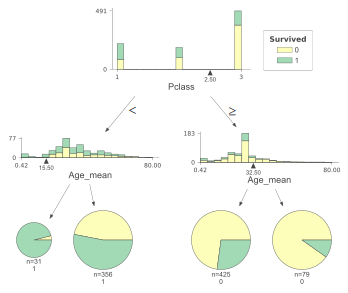

In [85]:
dtreeviz(tfdf_shadow)

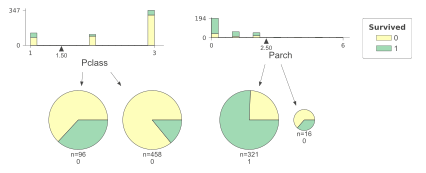

In [34]:

dtreeviz(tfdf_shadow, depth_range_to_display=(1, 2))

In [40]:
X = dataset[features_clf].iloc[1]
X

Pclass             1.0000
Sex_label          1.0000
Embarked_label     1.0000
Age_mean          38.0000
SibSp              1.0000
Parch              0.0000
Fare              71.2833
Name: 1, dtype: float64

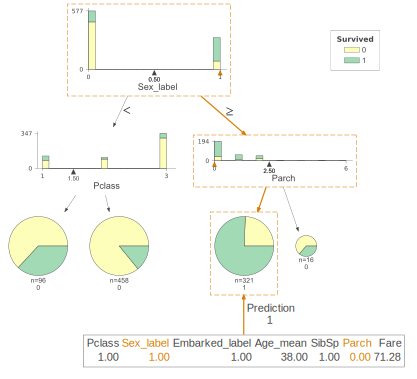

In [41]:
dtreeviz(tfdf_shadow, show_just_path=False, X=X)

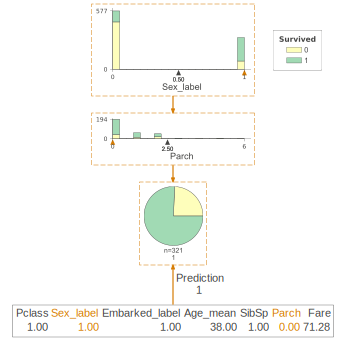

In [39]:
dtreeviz(tfdf_shadow, show_just_path=True, X=X)

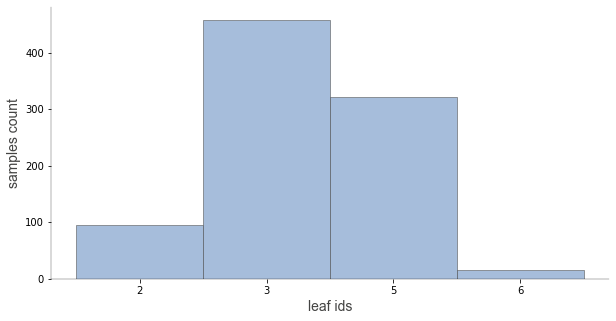

In [29]:
viz_leaf_samples(tfdf_shadow)

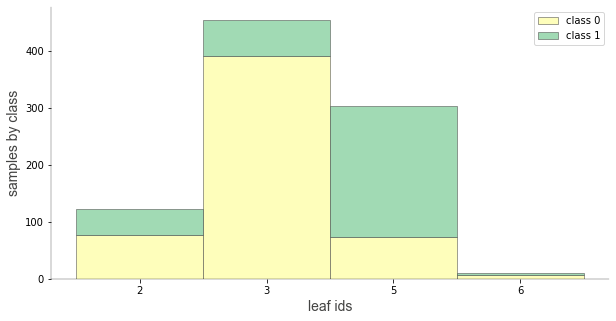

In [31]:
ctreeviz_leaf_samples(tfdf_shadow)

In [42]:
viz_leaf_criterion(tfdf_shadow)

VisualisationNotYetSupportedError: get_node_criterion() is not implemented yet for TensorFlow Decision Forests

In [43]:
describe_node_sample(tfdf_shadow, node_id=2)

,Pclass,Sex_label,Embarked_label,Age_mean,SibSp,Parch,Fare
count,122.0,122.0,122.000000,122.000000,122.000000,122.000000,122.000000
mean,1.0,0.0,0.360656,39.287717,0.311475,0.278689,67.226127
std,0.0,0.0,0.499017,14.446502,0.546695,0.658853,77.548021
min,1.0,0.0,0.000000,0.920000,0.000000,0.000000,0.000000
25%,1.0,0.0,0.000000,29.699118,0.000000,0.000000,27.728100
50%,1.0,0.0,0.000000,36.000000,0.000000,0.000000,41.262500
75%,1.0,0.0,1.000000,49.000000,1.000000,0.000000,78.459375
max,1.0,0.0,2.000000,80.000000,3.000000,4.000000,512.329200


In [45]:
print(explain_prediction_path(tfdf_shadow, X))

0.5 <= Sex_label 
Parch < 2.5



VisualisationNotYetSupportedError: get_score() is not implemented yet for TensorFlow Decision Forests

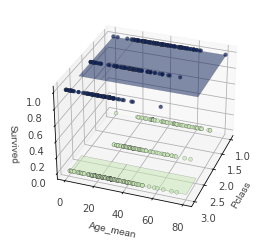

In [89]:
rtreeviz_bivar_3D(tfdf_shadow,
                 fontsize=10,
                 elev=30,
                 azim=20,
                 dist=10,
                 show={'splits','title'},
                 colors={'tesselation_alpha':.5})

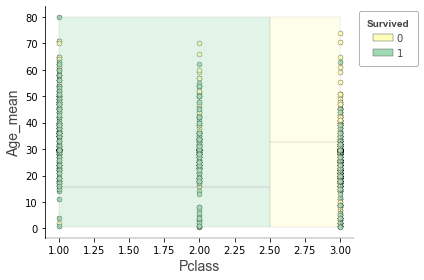

In [88]:
ctreeviz_bivar(tfdf_shadow,
               show={'splits', "legend"}, 
               colors={'scatter_edge': 'black'})
plt.tight_layout()
plt.show()